In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats.stats import pearsonr
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})  

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
dataset = pd.read_csv('./dataset/train.csv')
dataset.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,0,...,1,12.0,5,-6,48,1022,-5,5.0,0.0,46


In [4]:
dataset.loc[dataset['IsOpen'] == 0, ['NumberOfCustomers','NumberOfSales']] = None
dataset.head(10)

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495.0,...,1,11.0,16,-2,70,1029,1,6.0,0.00,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608.0,...,3,13.0,10,-2,58,1025,1,10.0,0.00,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665.0,...,3,11.0,10,-3,55,1023,2,8.0,0.00,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630.0,...,3,15.0,10,-6,25,1022,-1,10.0,0.00,108
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,NaN,...,1,12.0,5,-6,48,1022,-5,5.0,0.00,46
5,1000,07/03/2016,0,1,1,Hyper Market,General,326,7,763.0,...,4,22.0,11,-4,26,1016,-2,16.0,0.00,68
6,1000,08/03/2016,0,1,1,Hyper Market,General,326,7,675.0,...,6,21.0,8,-4,24,1008,-2,18.0,0.00,62
7,1000,09/03/2016,0,1,1,Hyper Market,General,326,7,690.0,...,7,22.0,10,-2,25,1000,-1,13.0,0.00,53
8,1000,10/03/2016,0,1,1,Hyper Market,General,326,7,617.0,...,11,14.0,6,0,28,999,6,7.0,0.00,54
9,1000,11/03/2016,0,1,1,Hyper Market,General,326,7,636.0,...,12,9.0,11,5,37,998,7,6.0,0.51,30


In [5]:
dataset_na = (dataset.isnull().sum() / len(dataset)) * 100
dataset_na = dataset_na.drop(dataset_na[dataset_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :dataset_na})
missing_data.head(10)

,Missing Ratio
Max_Gust_SpeedKm_h,78.380600
Events,23.727154
NumberOfSales,17.028571
NumberOfCustomers,17.028571
CloudCover,7.873680
Min_VisibilitykM,2.167791
Mean_VisibilityKm,2.167791
Max_VisibilityKm,2.167791


In [6]:
dataset["NumberOfCustomers"] = dataset.groupby('StoreID')["NumberOfCustomers"].transform(lambda x: x.fillna(x.mean()))

In [7]:
dataset["NumberOfSales"] =dataset.groupby('StoreID')["NumberOfSales"].transform(lambda x: x.fillna(x.mean()))


In [8]:
dataset_na = (dataset.isnull().sum() / len(dataset)) * 100
dataset_na = dataset_na.drop(dataset_na[dataset_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :dataset_na})
missing_data.head(10)

,Missing Ratio
Max_Gust_SpeedKm_h,78.380600
Events,23.727154
CloudCover,7.873680
Min_VisibilitykM,2.167791
Mean_VisibilityKm,2.167791
Max_VisibilityKm,2.167791


In [9]:
pd.options.mode.chained_assignment = None  # default='warn'

def convert_to_date(sample):
    sample['Date'] = pd.to_datetime(sample['Date'],format='%d/%m/%Y')
    
def get_store_data(store_id):
    return dataset.loc[dataset['StoreID'] == store_id]
    

In [10]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%m')
yearsFmt = mdates.DateFormatter('%Y')
monthsYearFmt = mdates.DateFormatter('%m-%Y')

#function that plots a store sale trend
def plot_storeNo(store_id):
    sampleStore = get_store_data(store_id)
    convert_to_date(sampleStore)
    
    
    
    fig, ax = plt.subplots()
    
    # format the ticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsYearFmt)
    ax.xaxis.set_minor_locator(months)
    
    ax.plot(sampleStore.Date, sampleStore.NumberOfSales)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsYearFmt)
    ax.xaxis.set_minor_locator(months)
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()
    
#function that plots many store sales trends in the whole amount of time with legend
def plot_stores(start_index,end_index):  
    fig, ax = plt.subplots()

    # format the ticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsYearFmt)
    ax.xaxis.set_minor_locator(months)
    
    stores_legend = []

    for i in range(start_index,end_index):
        sampleStore = get_store_data(i)
        convert_to_date(sampleStore)
    
        ax.plot(sampleStore.Date, sampleStore.NumberOfSales)
        stores_legend.append('Store '+str(i))
        
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsYearFmt)
    ax.xaxis.set_minor_locator(months)
    plt.legend(stores_legend, loc='upper left')

    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()    

In [11]:
sampleStore = dataset.loc[dataset['StoreID'] == 1000]

In [12]:
s = sampleStore[:4]
s

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495.0,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608.0,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665.0,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630.0,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108


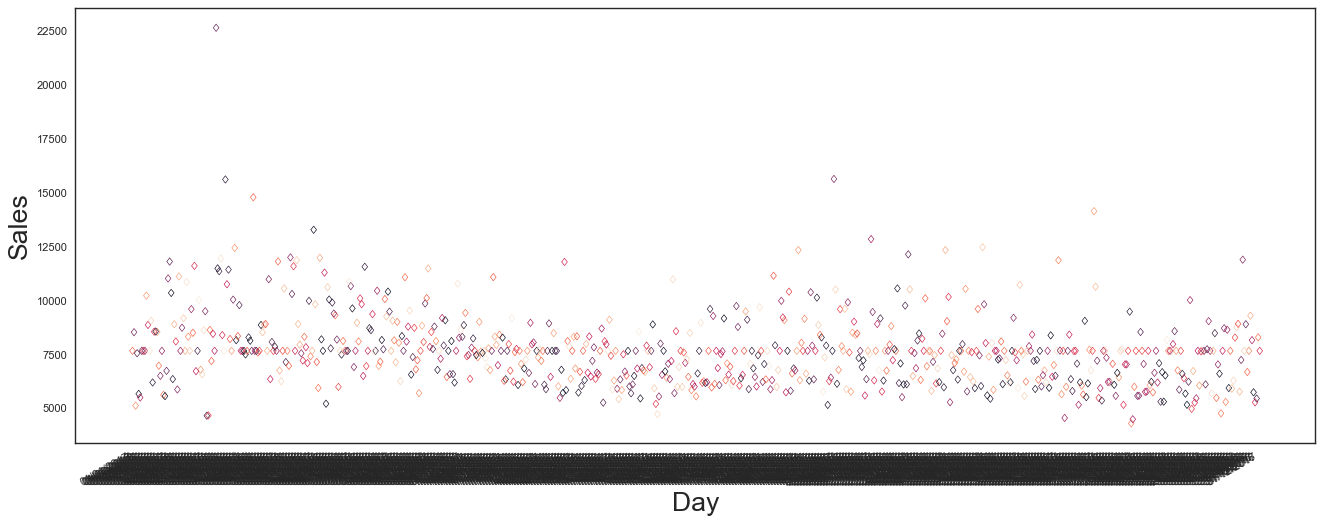

In [13]:
import datetime
import random
plt.rcParams['figure.figsize'] = [20.0,8.0]
plt.rcParams['figure.dpi']=80

#x = sampleStore['Date'][:100]
#y = sampleStore['NumberOfSales'][:100]
x = sampleStore['Date']
y = sampleStore['NumberOfSales']

plt.xlabel("Day")
plt.ylabel("Sales")

colors = np.random.rand(*x.shape)
# plot
plt.scatter(x, y, c=colors, marker=r'$\diamondsuit$', alpha=0.8)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

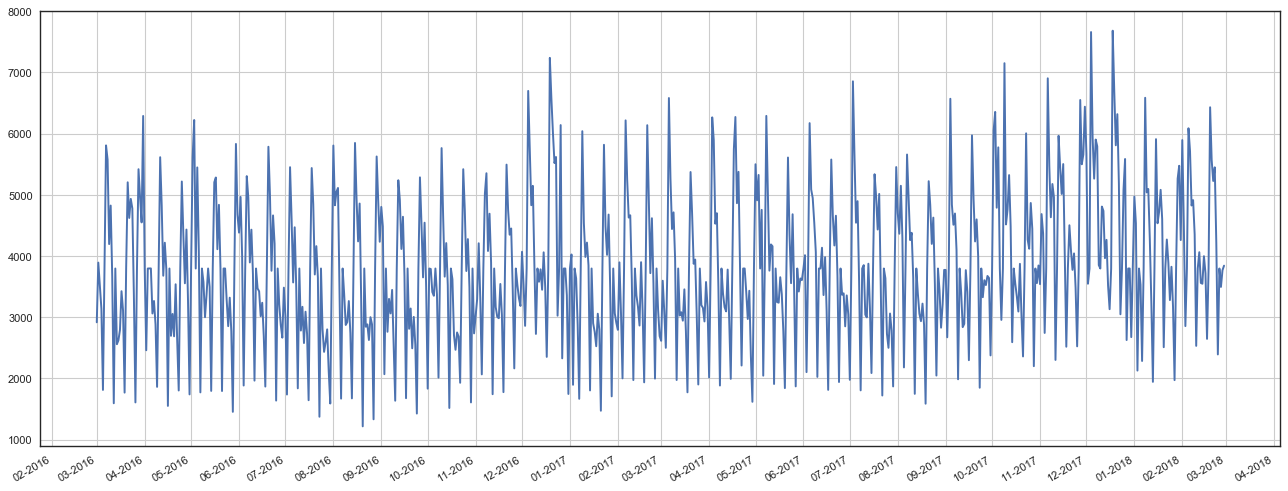

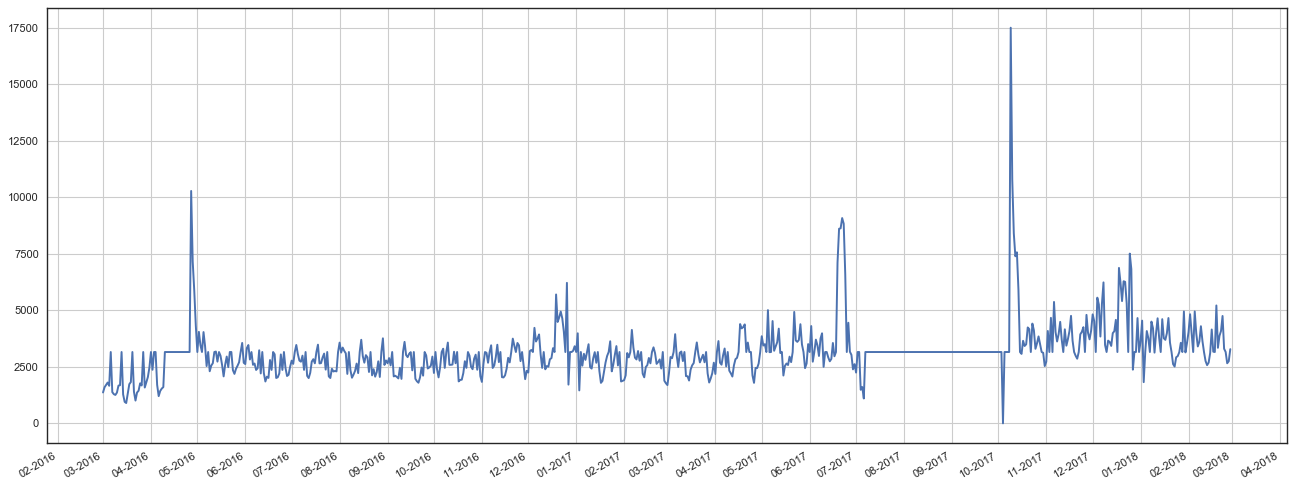

In [14]:
plot_storeNo(1023)
plot_storeNo(1001)

In [ ]:
#dataset.to_csv('./dataset/imputed_Mean_IsClosed_train.csv', index=False)